In [3]:
import torch
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
sys.path.append('../../')

from utils import load_model

device = 'cuda:0'

In [4]:
model_name = 'CT_Sigma_25_t_10'
model = load_model(model_name, device=device)

--- loading checkpoint from epoch 10 ---
---------------------
Building a CRR-NN model with 
 - [1, 8, 32] channels 
 splines parameters:
  (LinearSpline(mode=conv, num_activations=32, init=zero, size=21, grid=0.010, monotonic_constraint=True.))
---------------------


In [38]:
n = 256
m = 1
sc = 0.01
mu = 10
lmbd = 0.005
x0 = torch.randn(m, 1, n, n, device=device)*sc

In [39]:
x0.requires_grad = True
cost = lmbd / mu * model.cost(mu * x0)
grad_autograd = torch.autograd.grad(cost, x0)[0]/sc

grad_spline = lmbd * model.grad(mu * x0)/sc

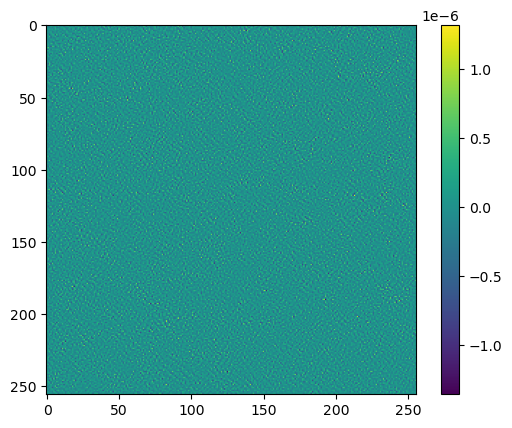

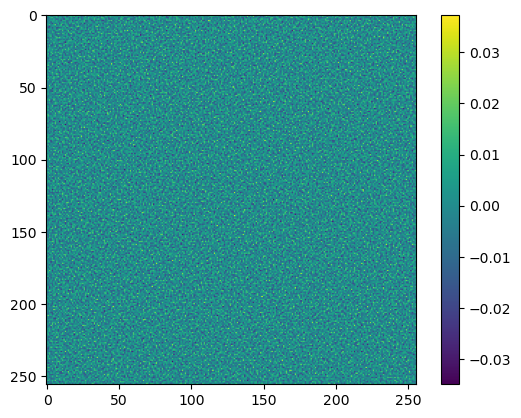

In [40]:
plt.figure()
plt.imshow((grad_autograd - grad_spline)[0, 0, :, :].cpu().detach().numpy())
plt.colorbar()

plt.figure()
plt.imshow(grad_spline[0, 0, :, :].cpu().detach().numpy())
plt.colorbar()

In [36]:
model.mu
mu = 10
lmbd = 0.005

Parameter containing:
tensor(0.4272, device='cuda:0', requires_grad=True)

Text(0.5, 1.0, 'Difference')

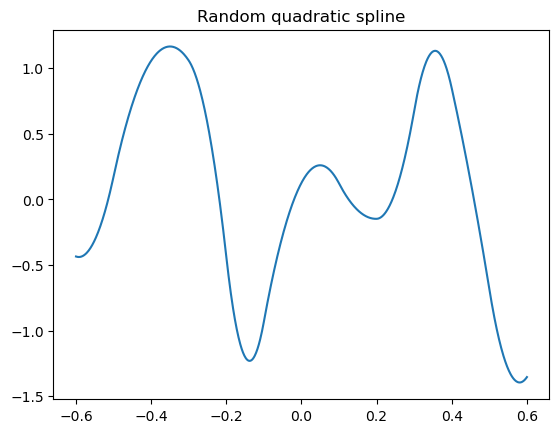

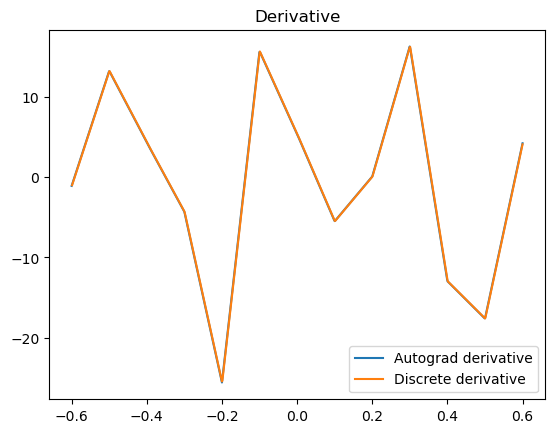

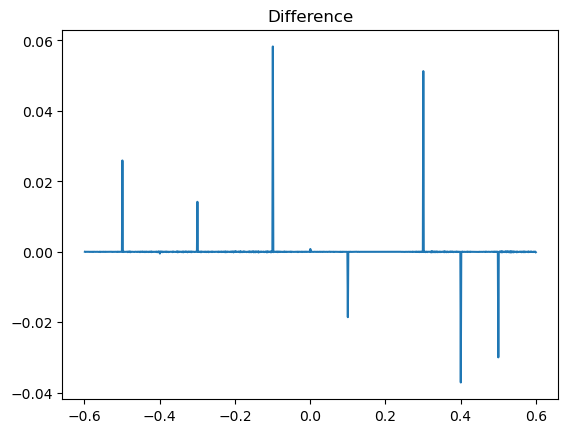

In [4]:
xmin = -0.6
xmax = 0.6
x = torch.linspace(xmin ,xmax,1000).view(-1, 1, 1, 1).expand(-1, n_ch, -1, -1)
x.requires_grad = True
y = qs(x)

plt.figure()
plt.plot(x[:, 0, 0, 0].detach().numpy(), y[:, 0, 0, 0].detach().numpy())
plt.title('Random quadratic spline')

dydx = torch.autograd.grad(y.sum(), x, create_graph=False)[0]
plt.figure()
plt.plot(x[:, 0, 0, 0].detach().numpy(), dydx[:, 0, 0, 0].detach().numpy(), label='Autograd derivative')
plt.title('Derivative')


dydx_discrete = y[:, 0, 0, 0].diff() / x[:, 0, 0, 0].diff()

plt.plot(x[1:, 0, 0, 0].detach().numpy(), dydx_discrete.detach().numpy(), label='Discrete derivative')

plt.legend()

plt.figure()
plt.plot(x[1:, 0, 0, 0].detach().numpy(), dydx_discrete.detach().numpy() - 0.5*(dydx[:-1, 0, 0, 0].detach().numpy() + dydx[1:, 0, 0, 0].detach().numpy()))
plt.title('Difference')